In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
import matplotlib.patches as patches
import itertools
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.model_selection import validation_curve
%matplotlib inline

In [3]:
df1 = pd.read_csv("2019H1BNumericNew1.csv")
df2 = pd.read_csv("H1BMutual.csv")
df3 = pd.read_csv("H1Bchi2.csv")
df4 = pd.read_csv("OneHot.csv")
df5 = pd.read_csv("chi25BestSelection.csv")
df6 = pd.read_csv("mutual_10BestSelection.csv")

In [99]:
#df6
MLdata= pd.read_csv('mutual_10BestSelection.csv')
pd.options.display.max_seq_items = None
MLdata.head()

,CASE_STATUS,CASE_SUBMITTED,SOC_CODE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,H-1B_DEPENDENT,NumOfNaN,PERIOD_OF_EMPLOYMENT_LENGTH,Annual_Wage,Fortune,EMPLOYER_REGION
0,1,1,15.0,1,0,0.0,4.0,3,2,0,2.0
1,1,2,13.0,1,0,0.0,4.0,3,0,0,3.0
2,1,2,15.0,1,0,1.0,13.0,3,2,0,3.0
3,1,2,17.0,1,0,0.0,5.0,3,1,1,2.0
4,1,0,15.0,1,0,0.0,15.0,3,2,1,2.0


In [112]:
# fill all the data with mode
for column in MLdata.columns:
    MLdata[column] = MLdata[column].fillna(MLdata[column].mode()[0])
    MLdata[column] = pd.to_numeric(MLdata[column]) # convert all columns of DataFrame to float

MLdata.isnull().sum()
xdata = MLdata.loc[:,MLdata.columns[1:]]
ydata = MLdata['CASE_STATUS']

In [122]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.33, random_state=5)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
print("linear SVC model score: %.3f" % clf.score(X_test, y_test))
clf_1 = SVC()
clf_1.fit(X_train, y_train)
print("RBF SVM model score: %.3f" % clf_1.score(X_test, y_test))
clf_2 = SVC(kernel='linear')
clf_2.fit(X_train, y_train)
print("Linear SVM model score: %.3f" % clf_2.score(X_test, y_test))
clf_3 = SVC(kernel='poly', degree=3)
clf_3.fit(X_train, y_train)
print("3rd Poly model score: %.3f" % clf_3.score(X_test, y_test))
clf_4 = SVC(kernel='poly', degree=4)
clf_4.fit(X_train, y_train)
print("4th Poly model score: %.3f" % clf_4.score(X_test, y_test))
clf_5_poly2 = SVC(kernel='poly')
clf_5_poly2.fit(X_train, y_train)
print("2nd Poly model score: %.3f" % clf_5_poly2.score(X_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


linear SVC model score: 0.719
RBF SVM model score: 0.753
Linear SVM model score: 0.749
3rd Poly model score: 0.751
4th Poly model score: 0.752
2nd Poly model score: 0.751


In [236]:
from sklearn.model_selection import StratifiedKFold

names = ['Linear SVC', 'Radial Basis Function SVM', 'Linear SVM',
         '2nd Degree Polynomial', '3rd Degree Polynomial', '4th Degree Polynomial']
classifiers = [
    LinearSVC(random_state=0),
    SVC(),
    SVC(kernel='linear'),
    SVC(kernel='poly', degree=2),
    SVC(kernel='poly', degree=3),
    SVC(kernel='poly', degree=4),
]

clfs_cv_score = {i :[] for i in names}
skf = StratifiedKFold(n_splits=5)
for name, clf in zip(names, classifiers):
    for train_index, test_index in skf.split(xdata, ydata):
        X_train, X_test = xdata.iloc[train_index, :], xdata.iloc[test_index, :]
        y_train, y_test = ydata[train_index], ydata[test_index]
        clf.fit(X_train, y_train)
        clfs_cv_score[name].append(clf.score(X_test, y_test))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

In [237]:
clfs_cv_score

{'Linear SVC': [0.7513919147906076,
  0.7506656983781167,
  0.7583535108958838,
  0.7535108958837773,
  0.7532687651331719],
 'Radial Basis Function SVM': [0.757201646090535,
  0.7540547083030743,
  0.7564164648910412,
  0.7556900726392252,
  0.7559322033898305],
 'Linear SVM': [0.7603485838779956,
  0.7528443476155895,
  0.7573849878934624,
  0.7513317191283293,
  0.7484261501210654],
 '2nd Degree Polynomial': [0.7562333575405471,
  0.7550229968530622,
  0.7547215496368038,
  0.7527845036319613,
  0.7515738498789346],
 '3rd Degree Polynomial': [0.756475429678044,
  0.7542967804405712,
  0.7559322033898305,
  0.7535108958837773,
  0.7549636803874092],
 '4th Degree Polynomial': [0.756475429678044,
  0.7530864197530864,
  0.7573849878934624,
  0.7547215496368038,
  0.7556900726392252]}

In [211]:
methods = []
kfolds = []
i = 0
j = 0
while (i < (len(names) * 5)):
    methods.append(names[j])
    kfolds.append("Fold{}".format(j+1))
    if (i % 5 == 4):
        j+=1
    i += 1

values =[]
for i, j in clfs_cv_score.items():
    for ind in range(len(j)):
        values.append(j[ind])

In [232]:
d = {'Accuracy Score': values, 'KFold': kfolds, "Methods":methods}
df_cv = pd.DataFrame(data=d)

In [238]:
avgs = {i:np.mean(j) for i, j in clfs_cv_score.items()}
avgs

{'Linear SVC': 0.7534381570163114,
 'Radial Basis Function SVM': 0.7558590190627412,
 'Linear SVM': 0.7540671577272885,
 '2nd Degree Polynomial': 0.7540672515082617,
 '3rd Degree Polynomial': 0.7550357979559263,
 '4th Degree Polynomial': 0.7554716919201243}

<Figure size 1080x720 with 0 Axes>

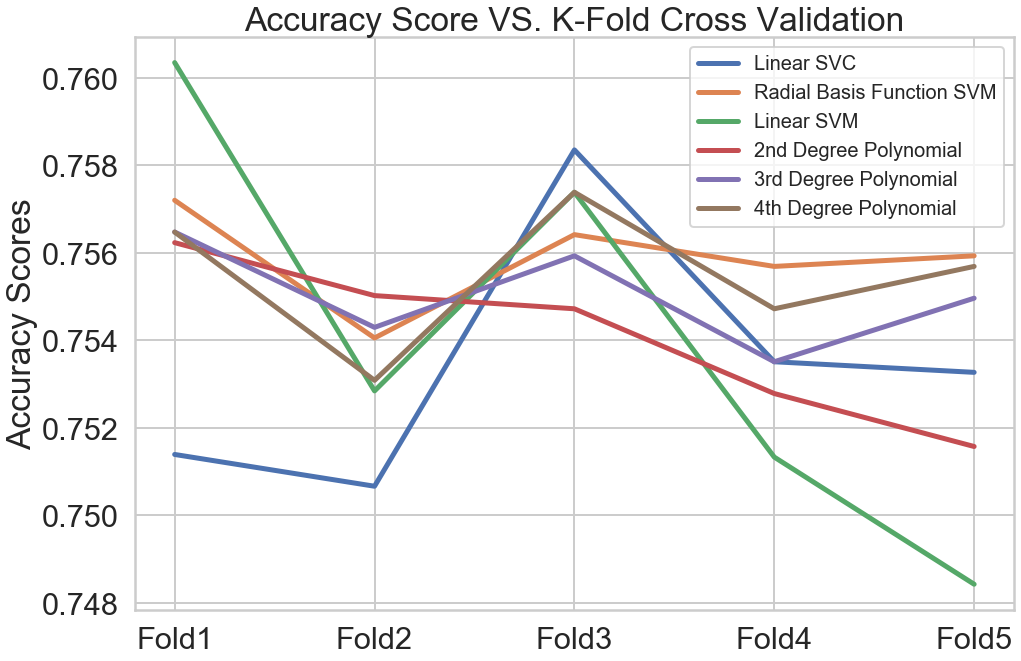

In [308]:
x_names = ["Fold{}".format(i+1) for i in range(5)]
sns.set(style=None)
sns.set_context("poster", font_scale=1.4,  rc={"lines.linewidth":5})
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=x_names, y=clfs_cv_score[names[0]], label=names[0], ax=ax)
sns.lineplot(x=x_names, y=clfs_cv_score[names[1]], label=names[1], ax=ax)
sns.lineplot(x=x_names, y=clfs_cv_score[names[2]], label=names[2], ax=ax)
sns.lineplot(x=x_names, y=clfs_cv_score[names[3]], label=names[3], ax=ax)
sns.lineplot(x=x_names, y=clfs_cv_score[names[4]], label=names[4], ax=ax)
sns.lineplot(x=x_names, y=clfs_cv_score[names[5]], label=names[5], ax=ax)
plt.ylabel("Accuracy Scores")
plt.legend(loc='upper right', prop={'size': 20})
plt.title("Accuracy Score VS. K-Fold Cross Validation")
ax.patch.set_color('none')
plt.tight_layout()
ax.patch.set_alpha(0.0)
fig.savefig('temp.png', facecolor=fig.get_facecolor(), edgecolor='none')
ax.patch.set_visible(False)
plt.show()

In [267]:
from sklearn.model_selection import StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.33, random_state=5)
C_range = np.arange(0.1, 5, 0.1)
gamma_range = [1e-1, 1, 1e1]
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))

KeyboardInterrupt: 

In [246]:
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.33, random_state=5)
C = np.arange(0.1, 5, 0.1)
accuracy = []
for i in C:
    clf_1 = SVC(C=i)
    clf_1.fit(X_train, y_train)
    accuracy.append(clf_1.score(X_test, y_test))

In [271]:
accuracy.index(max(accuracy))
C[46]

4.7

In [295]:
accuracy[46]

0.7582159624413145

In [286]:
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.33, random_state=5)
C = np.arange(0.1, 5, 0.1)
accuracy = []
clf_final = SVC(C=4.7, gamma=0.1)
clf_final.fit(X_train, y_train)
print("2nd Poly model score: %.3f" % clf_final.score(X_test, y_test))

2nd Poly model score: 0.788


In [278]:
accuracy_gamma = []
gamma_range = np.arange(0.1, 1, 0.1)
for i in gamma_range:
    clf_1 = SVC(C=4.7, gamma=i)
    clf_1.fit(X_train, y_train)
    accuracy_gamma.append(clf_1.score(X_test, y_test))

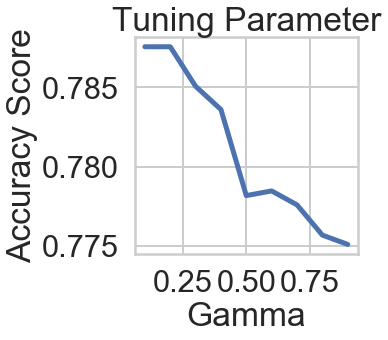

In [294]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(gamma_range, accuracy_gamma)
plt.xlabel("Gamma")
plt.ylabel('Accuracy Score')
plt.title("Tuning Parameter")
plt.show()
fig.savefig('tuneg.png')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.33, random_state=5)
C = np.arange(0.1, 5, 0.1)
accuracy = []
for i in C:
    clf_1 = SVC(C=i, gamma=0.1)
    clf_1.fit(X_train, y_train)
    accuracy.append(clf_1.score(X_test, y_test))

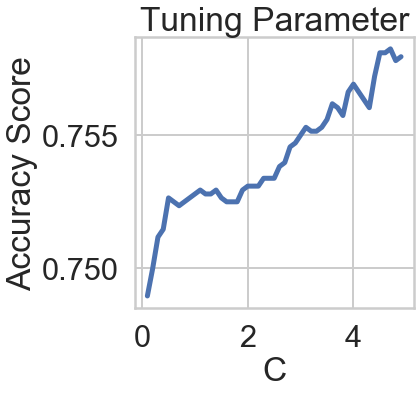

In [265]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(C, accuracy)
plt.xlabel("C")
plt.ylabel('Accuracy Score')
plt.title("Tuning Parameter")
plt.show()
fig.savefig('tunec.png')

In [299]:
def Kfold(xdata,ydata):
    train_accuracy =[]
    test_accuracy = []
    ACC = []
    TPR = []
    TNR = []
    PPV = []
    f1 = []
    ConfusionBox = np.array([[0,0],[0,0]])
    cv = StratifiedKFold(n_splits=5,shuffle=False)

    for train,test in cv.split(xdata,ydata):
        xtrain = xdata.iloc[train]
        ytrain = ydata.iloc[train]
        xtest = xdata.iloc[test]
        ytest = ydata.iloc[test]
    
#####where you need to modify -------------------------------------------------------------------------    
        clf_f = SVC(C=4.7, gamma=0.1)
        clf_f.fit(xtrain,np.ravel(ytrain))
        ypred = clf_f.predict(xtest)
        #Compute accuracy on the training set
        train_accuracy.append(clf_f.score(xtrain,ytrain))
        #Compute accuracy on the test set
        test_accuracy.append(clf_f.score(xtest,ytest))
#####where you need to modify -------------------------------------------------------------------------    

        
        CM = confusion_matrix(ytest,ypred)
        TN = CM[0][0]
        FN = CM[1][0]
        TP = CM[1][1]
        FP = CM[0][1]
        ConfusionBox += CM
        # Overall accuracy
        ACC.append((TP+TN)/(TP+FP+FN+TN))
        # Sensitivity, hit rate, recall, or true positive rate
        TPR.append(TP/(TP+FN))
        # Specificity or true negative rate
        TNR.append(TN/(TN+FP))
        # Precision or positive predictive value
        PPV.append(TP/(TP+FP))
        # f1 score
        f1.append(f1_score(ytest,ypred))
    
    return np.mean(train_accuracy),np.mean(test_accuracy),np.mean(ACC),np.mean(TPR),np.mean(TNR),np.mean(PPV),np.mean(f1),ConfusionBox

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#####where you need to modify -------------------------------------------------------------------------    
def SVMAucRocCurve():
    clf_f = SVC(C=4.7, gamma=0.1)
    clf_f.fit(xtrain,np.ravel(ytrain))
    ypred = clf_f.predict_proba(xtest)[:,1]
#####where you need to modify -------------------------------------------------------------------------    
    
    fpr, tpr, thresholds = roc_curve(ytest, ypred)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='SVM')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("SVM ROC Curve")
    plt.show()

Confusion matrix
[[ 1509  3654]
 [  729 14760]]


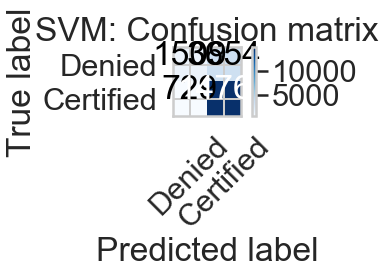

In [300]:
train_accuracy,test_accuracy,ACC,TPR,TNR,PPV,f1,ConfusionBox=Kfold(xdata,ydata)
plt.figure()
plot_confusion_matrix(ConfusionBox,classes=['Denied','Certified'],title='SVM: Confusion matrix')

#### DataFrame Cross Validation

# DataFrame 1

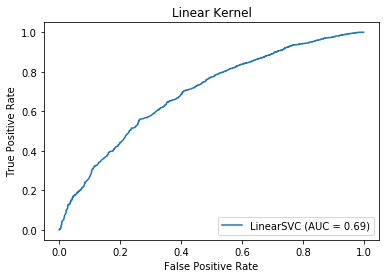

In [125]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(clf, X_test, y_test)
plt.title("Linear Kernel")
plt.show() 

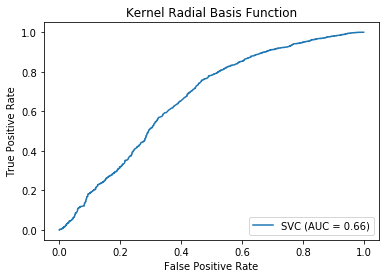

In [126]:
metrics.plot_roc_curve(clf_1, X_test, y_test)
plt.title("Kernel Radial Basis Function")
plt.show() 

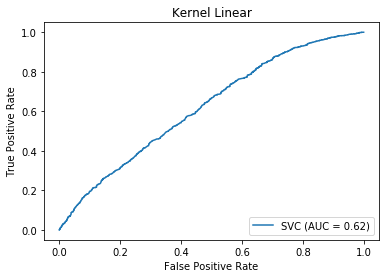

In [127]:
metrics.plot_roc_curve(clf_2, X_test, y_test)
plt.title("Kernel Linear")
plt.show() 

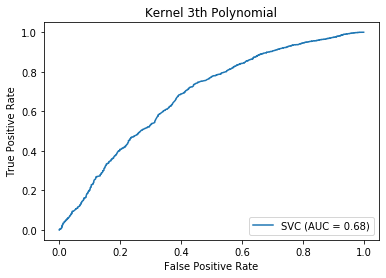

In [128]:
metrics.plot_roc_curve(clf_3, X_test, y_test)
plt.title("Kernel 3th Polynomial")
plt.show() 

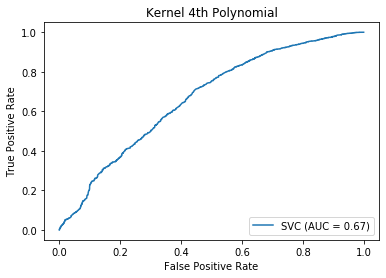

In [129]:
metrics.plot_roc_curve(clf_4, X_test, y_test)
plt.title("Kernel 4th Polynomial")
plt.show() 

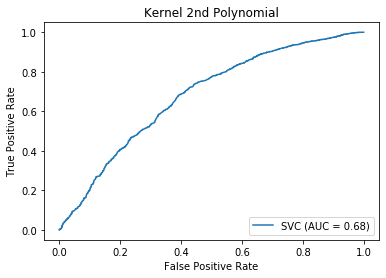

In [124]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(clf_5_poly2, X_test, y_test)
plt.title("Kernel 2nd Polynomial")
plt.show() 

In [4]:
df1.head()

,CASE_STATUS,CASE_SUBMITTED,SOC_CODE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,AGENT_REPRESENTING_EMPLOYER,H-1B_DEPENDENT,WILLFUL_VIOLATOR,NumOfNaN,PERIOD_OF_EMPLOYMENT_LENGTH,Annual_Wage,Fortune,EMPLOYER_REGION
0,0,3,11.0,1,0,1.0,0.0,0.0,5.0,3,0,0,4.0
1,0,1,13.0,1,0,0.0,1.0,0.0,12.0,2,2,0,4.0
2,0,1,15.0,1,0,1.0,0.0,0.0,10.0,3,2,0,2.0
3,0,0,11.0,0,0,0.0,0.0,0.0,18.0,3,2,0,4.0
4,0,2,51.0,1,0,0.0,0.0,0.0,17.0,3,0,0,4.0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 13 columns):
CASE_STATUS                    20652 non-null int64
CASE_SUBMITTED                 20652 non-null int64
SOC_CODE                       20652 non-null float64
FULL_TIME_POSITION             20652 non-null int64
TOTAL_WORKER_POSITIONS         20652 non-null int64
AGENT_REPRESENTING_EMPLOYER    20647 non-null float64
H-1B_DEPENDENT                 20632 non-null float64
WILLFUL_VIOLATOR               20632 non-null float64
NumOfNaN                       20652 non-null float64
PERIOD_OF_EMPLOYMENT_LENGTH    20652 non-null int64
Annual_Wage                    20652 non-null int64
Fortune                        20652 non-null int64
EMPLOYER_REGION                20652 non-null float64
dtypes: float64(6), int64(7)
memory usage: 2.0 MB


In [13]:
df1['AGENT_REPRESENTING_EMPLOYER'] = df1['AGENT_REPRESENTING_EMPLOYER'].fillna(1.0)

In [17]:
df1['H-1B_DEPENDENT'] = df1['H-1B_DEPENDENT'].fillna(0.0)

In [19]:
df1['WILLFUL_VIOLATOR'] = df1['WILLFUL_VIOLATOR'].fillna(0.0)

In [20]:
X_1 = df1.iloc[:, 1:]
y_1 = df1['CASE_STATUS']

Tune Parameter

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.33, random_state=5)
clf = LinearSVC(random_state=0, tol=1e-5, )
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
clf_1 = SVC()
clf_1.fit(X_train, y_train)
print("model score: %.3f" % clf_1.score(X_test, y_test))
clf_2 = SVC(kernel='linear')
clf_2.fit(X_train, y_train)
print("model score: %.3f" % clf_2.score(X_test, y_test))
clf_3 = SVC(kernel='poly', degree=3)
clf_3.fit(X_train, y_train)
print("model score: %.3f" % clf_3.score(X_test, y_test))
clf_4 = SVC(kernel='poly', degree=4)
clf_4.fit(X_train, y_train)
print("model score: %.3f" % clf_4.score(X_test, y_test))

In [54]:
df1.describe()

,CASE_STATUS,CASE_SUBMITTED,SOC_CODE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,AGENT_REPRESENTING_EMPLOYER,H-1B_DEPENDENT,WILLFUL_VIOLATOR,NumOfNaN,PERIOD_OF_EMPLOYMENT_LENGTH,Annual_Wage,Fortune,EMPLOYER_REGION
count,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000,20652.000000
mean,0.750000,1.694896,16.325102,0.970947,0.034186,0.699593,0.320937,0.000581,7.926012,2.886355,1.394393,0.071180,2.286026
std,0.433023,0.922983,4.505928,0.167959,0.206648,0.458446,0.466848,0.024099,4.598114,0.427850,0.838942,0.257131,1.066875
min,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.750000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,1.000000
50%,1.000000,2.000000,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,2.000000,0.000000,2.000000
75%,1.000000,2.000000,15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000
max,1.000000,3.000000,53.000000,1.000000,3.000000,1.000000,1.000000,1.000000,26.000000,4.000000,2.000000,1.000000,5.000000


In [64]:
def change(i):
    if i >= 1:
        return i * 15
    else:
        return i

df1_copy['TOTAL_WORKER_POSITIONS'] = df1_copy['TOTAL_WORKER_POSITIONS'].apply(change)
df1_copy['NumOfNaN'] = df1_copy['NumOfNaN'].apply(change)
df1_copy['PERIOD_OF_EMPLOYMENT_LENGTH'] = df1_copy['PERIOD_OF_EMPLOYMENT_LENGTH'].apply(change)

In [63]:
X_copy = df1_copy.iloc[:, 1:]
y_copy = df1_copy['CASE_STATUS']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.33, random_state=5)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
clf_1 = SVC()
clf_1.fit(X_train, y_train)
print("model score: %.3f" % clf_1.score(X_test, y_test))
clf_2 = SVC(kernel='linear')
clf_2.fit(X_train, y_train)
print("model score: %.3f" % clf_2.score(X_test, y_test))
clf_3 = SVC(kernel='poly', degree=3)
clf_3.fit(X_train, y_train)
print("model score: %.3f" % clf_3.score(X_test, y_test))
clf_4 = SVC(kernel='poly', degree=4)
clf_4.fit(X_train, y_train)
print("model score: %.3f" % clf_4.score(X_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


model score: 0.753
model score: 0.756
model score: 0.755
model score: 0.756
model score: 0.758


# DataFrame 2

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 30 columns):
CASE_STATUS                    20652 non-null int64
CASE_SUBMITTED                 20652 non-null int64
FULL_TIME_POSITION             20652 non-null int64
H-1B_DEPENDENT                 20652 non-null float64
NumOfNaN                       20652 non-null float64
PERIOD_OF_EMPLOYMENT_LENGTH    20652 non-null int64
Annual_Wage                    20652 non-null int64
is_South                       20652 non-null float64
is_West                        20652 non-null float64
SOC_CODE_11.0                  20652 non-null float64
SOC_CODE_13.0                  20652 non-null float64
SOC_CODE_15.0                  20652 non-null float64
SOC_CODE_17.0                  20652 non-null float64
SOC_CODE_19.0                  20652 non-null float64
SOC_CODE_21.0                  20652 non-null float64
SOC_CODE_23.0                  20652 non-null float64
SOC_CODE_27.0                  20652 

In [24]:
X_2 = df2.iloc[:, 1:]
y_2 = df2['CASE_STATUS']

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.33)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.763


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# DataFrame3

In [26]:
df3.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 32 columns):
CASE_STATUS                    20652 non-null int64
CASE_SUBMITTED                 20652 non-null int64
FULL_TIME_POSITION             20652 non-null int64
TOTAL_WORKER_POSITIONS         20652 non-null int64
H-1B_DEPENDENT                 20652 non-null float64
WILLFUL_VIOLATOR               20652 non-null float64
NumOfNaN                       20652 non-null float64
PERIOD_OF_EMPLOYMENT_LENGTH    20652 non-null int64
Annual_Wage                    20652 non-null int64
Fortune                        20652 non-null int64
is_South                       20652 non-null float64
is_West                        20652 non-null float64
OutOfUS                        20652 non-null float64
SOC_CODE_11.0                  20652 non-null float64
SOC_CODE_13.0                  20652 non-null float64
SOC_CODE_15.0                  20652 non-null float64
SOC_CODE_17.0                  20652 non-

In [27]:
X_3 = df3.iloc[:, 1:]
y_3 = df3['CASE_STATUS']

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.33)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.762


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# DataFrame4

In [28]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 38 columns):
CASE_STATUS                    20652 non-null int64
CASE_SUBMITTED                 20652 non-null int64
FULL_TIME_POSITION             20652 non-null int64
TOTAL_WORKER_POSITIONS         20652 non-null int64
AGENT_REPRESENTING_EMPLOYER    20647 non-null float64
H-1B_DEPENDENT                 20632 non-null float64
WILLFUL_VIOLATOR               20632 non-null float64
NumOfNaN                       20652 non-null float64
PERIOD_OF_EMPLOYMENT_LENGTH    20652 non-null int64
Annual_Wage                    20652 non-null int64
Fortune                        20652 non-null int64
is_South                       20652 non-null float64
is_West                        20652 non-null float64
is_Northeast                   20652 non-null float64
is_Midwest                     20652 non-null float64
OutOfUS                        20652 non-null float64
SOC_CODE_11.0                  20652 non-

In [29]:
df4['AGENT_REPRESENTING_EMPLOYER'] = df4['AGENT_REPRESENTING_EMPLOYER'].fillna(1.0)

In [30]:
df4['H-1B_DEPENDENT'] = df4['H-1B_DEPENDENT'].fillna(0.0)

In [31]:
df4['WILLFUL_VIOLATOR'] = df4['WILLFUL_VIOLATOR'].fillna(0.0)

In [42]:
X_4 = df4.iloc[:, 1:]
y_4 = df4['CASE_STATUS']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.33, random_state=0)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

clf_h = LinearSVC(loss ='hinge',random_state=0, tol=1e-5)
clf_h.fit(X_train, y_train)
print("model score: %.3f" % clf_h.score(X_test, y_test))

from sklearn.svm import NuSVC
clf_n = NuSVC()
clf_n.fit(X_train, y_train)
print("model score: %.3f" % clf_n.score(X_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


model score: 0.766


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


model score: 0.760
model score: 0.767


In [50]:
clf_svc = SVC(random_state=0, tol=1e-5)
clf_svc.fit(X_train, y_train)
print("model score: %.3f" % clf_svc.score(X_test, y_test))

model score: 0.753


# DataFrame5

In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 6 columns):
CASE_STATUS       20652 non-null int64
SOC_CODE          20652 non-null float64
H-1B_DEPENDENT    20652 non-null float64
NumOfNaN          20652 non-null float64
Annual_Wage       20652 non-null int64
Fortune           20652 non-null int64
dtypes: float64(3), int64(3)
memory usage: 968.2 KB


In [49]:
X_5 = df5.iloc[:, 1:]
y_5 = df5['CASE_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.33)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.751


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# DataFrame6

In [47]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 11 columns):
CASE_STATUS                    20652 non-null int64
CASE_SUBMITTED                 20652 non-null int64
SOC_CODE                       20652 non-null float64
FULL_TIME_POSITION             20652 non-null int64
TOTAL_WORKER_POSITIONS         20652 non-null int64
H-1B_DEPENDENT                 20652 non-null float64
NumOfNaN                       20652 non-null float64
PERIOD_OF_EMPLOYMENT_LENGTH    20652 non-null int64
Annual_Wage                    20652 non-null int64
Fortune                        20652 non-null int64
EMPLOYER_REGION                20652 non-null float64
dtypes: float64(4), int64(7)
memory usage: 1.7 MB


In [48]:
X_6 = df6.iloc[:, 1:]
y_6 = df6['CASE_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size=0.33)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.748


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
